In [1]:
import numpy as np
import pandas as pd
import imp
import lexrank
from matplotlib import pyplot as plt
from data_providers import DummyDataProvider, CachedSmallDataProvider
from clustering import DummyClustering, KMeansClustering
from preprocessors import DummyPreprocessor
from vectorizers import DummyVectorizer, FastTextMeanVectorizer
from sentiment import VaderSentimentAnalyser
from labeler import LexRankSummarizer
import utils

In [2]:
vectorizer = FastTextMeanVectorizer()

In [3]:
dataProvider = CachedSmallDataProvider("brexit")
tweets = dataProvider.load_data()
tweets[:3]

['RT @YDdraigGoch12: @andybrexiteer “There is an argument that leaving the EU automatically triggers departure from the EAA. There’s another…',
 'RT @BestForBritain: What worries you most about a Johnson Brexit?  ~pm',
 'Yes, ignore anyone with a different view']

In [4]:
preprocessor = DummyPreprocessor()
clean_tweets = preprocessor.clean_tweets(tweets)
clean_tweets[:3]

['RT @YDdraigGoch12: @andybrexiteer “There is an argument that leaving the EU automatically triggers departure from the EAA. There’s another…',
 'RT @BestForBritain: What worries you most about a Johnson Brexit?  ~pm',
 'Yes, ignore anyone with a different view']

In [5]:
vecs = vectorizer.vectorize(clean_tweets)
vecs.shape

(10001, 300)

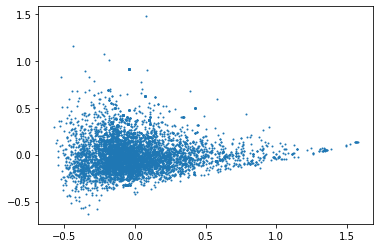

In [6]:
utils.scatter2d(vecs)

In [7]:
clusterer = KMeansClustering(4)
cluster_assignments = clusterer.cluster(vecs)
pd.Series(cluster_assignments).value_counts()

0    4630
1    2581
2    1927
3     863
dtype: int64

In [8]:
sentiment_analyser = VaderSentimentAnalyser()
sentiments = sentiment_analyser.get_sentiment(clean_tweets)
sentiments[:10]

[0.3194,
 0.28925,
 0.5258,
 0.08215,
 0.21405000000000002,
 0.20029999999999998,
 0.8753,
 0.5,
 0.11414999999999997,
 0.9531000000000001]

In [9]:
summarizer = LexRankSummarizer()
for cluster_id in np.unique(cluster_assignments):
    cluster_tweets = np.array(clean_tweets)[cluster_assignments == cluster_id]
    print(summarizer.get_cluster_summary(cluster_tweets, 2))

0
seleced
['RT @LordAshcroft: If Brexit had not been an issue at this election, would you have voted the same way? https://t.co/L2nxGAP6Xh', 'RT @Ukrainolution: @APHClarkson Many will disagree with me but I believe Brexit is less likely now than it was before the election. Before…']
1
seleced
['RT @EmLouise950: The only way out of the brexit mess: #UnityPlan', 'RT @EmLouise950: The only way out of the brexit mess: #UnityPlan']
2
seleced
['RT @IrishUnity: There’s only one good Brexit for Ireland. https://t.co/EwChQQ2GGn', 'RT @brendaanne66: Three British Hens (no more french one’s thanks to brexit) #AwfullyBritish12DaysOfXmas']
3
seleced


ValueError: documents are not informative